In [23]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
blood =pd.read_csv('blood.csv') # Load your CSV
print(blood) # Now display the DataFrame

     V1  V2     V3  V4  Class
0     2  50  12500  98      2
1     0  13   3250  28      2
2     1  16   4000  35      2
3     2  20   5000  45      2
4     1  24   6000  77      1
..   ..  ..    ...  ..    ...
743  23   2    500  38      1
744  21   2    500  52      1
745  23   3    750  62      1
746  39   1    250  39      1
747  72   1    250  72      1

[748 rows x 5 columns]


In [14]:
# Display the first 5 rows of the 'blood' DataFrame
# This gives a quick overview of the dataset: column names, data types, and sample values
blood.head(5)

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [13]:
print(blood.head(5)) # Display the first 5 rows

   V1  V2     V3  V4  Class
0   2  50  12500  98      2
1   0  13   3250  28      2
2   1  16   4000  35      2
3   2  20   5000  45      2
4   1  24   6000  77      1


✅ Compatible matches: 27 out of 64 (42.2%)


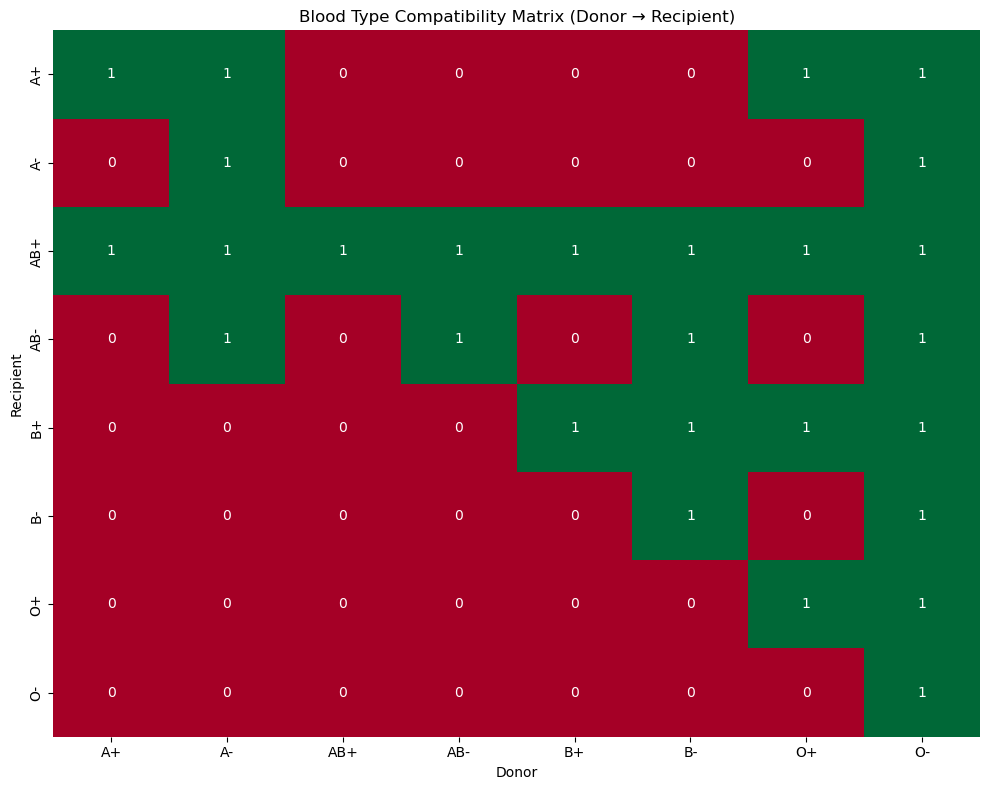

,Donor,Recipient,Compatible
0,O-,O-,True
1,O-,O+,True
2,O-,A-,True
3,O-,A+,True
4,O-,B-,True
...,...,...,...
59,AB+,A+,False
60,AB+,B-,False
61,AB+,B+,False
62,AB+,AB-,False


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'blood' DataFrame exists with 'Donor' and 'Recipient' columns
# If not, let's create a sample one
if 'blood' not in locals():
    # Create sample data
    donors = ["O-", "O+", "A-", "A+", "B-", "B+", "AB-", "AB+"]
    recipients = ["O-", "O+", "A-", "A+", "B-", "B+", "AB-", "AB+"]
    
    # Create all possible combinations
    blood_data = []
    for donor in donors:
        for recipient in recipients:
            blood_data.append({"Donor": donor, "Recipient": recipient})
    
    blood = pd.DataFrame(blood_data)

# Blood transfusion compatibility dictionary (recipient → allowed donors)
compatibility = {
    "O-": ["O-"],
    "O+": ["O-", "O+"],
    "A-": ["O-", "A-"],
    "A+": ["O-", "O+", "A-", "A+"],
    "B-": ["O-", "B-"],
    "B+": ["O-", "O+", "B-", "B+"],
    "AB-": ["O-", "A-", "B-", "AB-"],
    "AB+": ["O-", "O+", "A-", "A+", "B-", "B+", "AB-", "AB+"]
}

def is_compatible(donor, recipient):
    if recipient in compatibility:
        return donor in compatibility[recipient]
    else:
        return False

# Apply compatibility check to each row
blood["Compatible"] = blood.apply(lambda row: is_compatible(row["Donor"], row["Recipient"]), axis=1)

# Calculate statistics
compatible_count = blood["Compatible"].sum()
total = len(blood)
compatibility_rate = (compatible_count / total) * 100

# Print summary
print(f"✅ Compatible matches: {compatible_count} out of {total} ({compatibility_rate:.1f}%)")

# Create a pivot table for visualization
pivot_table = blood.pivot_table(
    values='Compatible', 
    index='Recipient', 
    columns='Donor', 
    aggfunc='first'
).astype(int)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="RdYlGn", annot=True, fmt="d", cbar=False)
plt.title("Blood Type Compatibility Matrix (Donor → Recipient)")
plt.tight_layout()
plt.show()

# Display the DataFrame with compatibility information
blood

In [17]:
def is_compatible(donor, recipient):
    compatibility = {
        "O-": ["O-"],
        "O+": ["O-", "O+"],
        "A-": ["O-", "A-"],
        "A+": ["O-", "O+", "A-", "A+"],
        "B-": ["O-", "B-"],
        "B+": ["O-", "O+", "B-", "B+"],
        "AB-": ["O-", "A-", "B-", "AB-"],
        "AB+": ["O-", "O+", "A-", "A+", "B-", "B+", "AB-", "AB+"]
    }
    return donor in compatibility.get(recipient, [])

# Start
print("Hello 👋")

# Collect user info
firstname = input("Enter your first name: ")
lastname = input("Enter your last name: ")
city = input("Enter your city: ")
country = input("Enter your country: ")
age = float(input("Enter your age: "))
your_group = input("Enter YOUR blood group: ").upper()
other_group = input("Enter the OTHER person's blood group: ").upper()

# Display basic info
print(f"\nWelcome {firstname} {lastname} from {city}, {country}!")
print(f"You are {age} years old.")

# Check blood group compatibility
if is_compatible(donor=other_group, recipient=your_group):
    print("✅ The other person CAN donate blood to you.")
else:
    print("❌ The other person CANNOT donate blood to you.")

print("Goodbye 👋")


Hello 👋


Enter your first name:  RIHAB
Enter your last name:  MORAFIQ
Enter your city:  CASABLANCA
Enter your country:  MOROCCO
Enter your age:  23
Enter YOUR blood group:  O+
Enter the OTHER person's blood group:  O+



Welcome RIHAB MORAFIQ from CASABLANCA, MOROCCO!
You are 23.0 years old.
✅ The other person CAN donate blood to you.
Goodbye 👋
